# Python 기초 통계 - Day1 - Assignment

**💡[ 학습 목표 ]**

1. pandas 로 데이터 불러오기 
2. 데이터 전처리 실습 (pandas, numpy) 
3. 간단한 시각화 실습 (matplotlib, seaborn)
4. 데이터 EDA 실습 (pandas profiling) 
5. github 계정 생성, github fork, pull request 1일차 과제 제출 
(※github의 제출은 선택사항.) 

---
*Copyright(c) 2024 All rights reserved by Hyeonjae Kim*

## 1. Pandas로 데이터 불러오기


In [1]:
# 샘플 데이터: https://www.kaggle.com/datasets/bertiemackie/daily-website-users
import pandas as pd
users = pd.read_csv('C:/Users/BIG3-06/Documents/빅데이터/02.05 실습과제 데이터/users.csv')
users.head()

,Unnamed: 0,date,measure,value
0,0,2019-01-01,daily_users,67
1,1,2019-01-02,daily_users,51
2,2,2019-01-03,daily_users,58
3,3,2019-01-04,daily_users,71
4,4,2019-01-05,daily_users,28


In [2]:
# Unnamed: 0 이라는 컬럼이 인덱스가 되도록 수정하세요
# === 아래에 코드 작성 === 

users.drop(['Unnamed: 0'], axis=1, inplace=True)
users.head()

,date,measure,value
0,2019-01-01,daily_users,67
1,2019-01-02,daily_users,51
2,2019-01-03,daily_users,58
3,2019-01-04,daily_users,71
4,2019-01-05,daily_users,28


## 2. 데이터 전처리 실습(pandas, numpy)
- (1) 결측치(Null, NaN) 확인 및 처리 
- (2) 중복값 확인 및 처리 
- (3) 데이터 타입 확인 및 제거
- (4) 데이터 타입 변경 처리 (날짜, 숫자, 범주형, 문자)
- (5) 집계
- (6) 피봇
- (7) concat
- (8) merge



(1) 결측치(Null, NaN) 확인 및 처리

In [3]:
# 샘플 데이터 링크 : https://www.kaggle.com/datasets/webdevbadger/international-student-demographics
# academic.csv데이터 사용.
# 데이터 설명(data description)
# year: The year. The format is YYYY/YY.
# students: The number of students.
# us_students: The number of non-international students.
# undergraduate: The number of undergraduate students.
# graduate: The number of graduate students.
# non_degree: The number of non-degree students.
# opt: The number of OPT students. OPT stands for Optional Practical Training.

academic = pd.read_csv('C:/Users/BIG3-06/Documents/빅데이터/데이터 전처리 실습 데이터/academic.csv')
academic

,year,students,us_students,undergraduate,graduate,non_degree,opt
0,1948/49,25464,2403400.0,NaN,NaN,NaN,NaN
1,1949/50,26433,2445000.0,NaN,NaN,NaN,NaN
2,1950/51,29813,2281000.0,NaN,NaN,NaN,NaN
3,1951/52,30462,2102000.0,NaN,NaN,NaN,NaN
4,1952/53,33675,2134000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
70,2018/19,1095299,19828000.0,431930.0,377943.0,62341.0,223085.0
71,2019/20,1075496,19720000.0,419321.0,374435.0,58201.0,223539.0
72,2020/21,914095,19744000.0,359787.0,329272.0,21151.0,203885.0
73,2021/22,948519,20327000.0,344532.0,385097.0,34131.0,184759.0


In [4]:
academic.shape

(75, 7)

In [5]:
academic.isna().sum()

year              0
students          0
us_students       3
undergraduate    26
graduate         26
non_degree       31
opt              31
dtype: int64

In [6]:
# dropna를 활용해 결측치 제거하기
# 공식문서: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

# 1) 결측치가 있는 모든 레코드를 제거 하세요 
# === 아래에 코드 작성 === 
# 제거후 shape: (44, 7) 이면 정답

academic1=academic.dropna(how='any')
academic1.shape

(44, 7)

In [7]:
# 2) 결측치가 있는 컬럼을 제거 하세요
# === 아래에 코드 작성 === 
# 제거후 shape: (75, 2) 이면 정답

academic2=academic.dropna(axis=1)
academic2.shape

(75, 2)

In [8]:
# 3) 모든 데이터가 결측치인 컬럼을 제거 하세요 
# 제거후 shape: (75, 7) 이고, 코드를 알맞게 썼으면 정답

academic3=academic.dropna(how='all')
academic3.shape

(75, 7)

(2) 중복값 확인 및 처리 

In [9]:
# 데이터 링크: https://archive.ics.uci.edu/dataset/2/adult
 
import pandas as pd 
column_headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                  'marital-status', 'occupation', 'relationship', 'race', 
                  'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                  'native-country', 'income']
adult_df = pd.read_csv('C:/Users/BIG3-06/Documents/빅데이터/adult/adult.data', names=column_headers)
adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
# duplicated로 중복 개수 확인하기
adult_df.duplicated().sum()

24

In [11]:
# duplicated로 중복데이터 확인하기 
adult_df[adult_df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [12]:
adult_df.shape

(32561, 15)

In [13]:
# 1) drop_duplicates 를 활용해 중복값 제거하고 shape 확인하기 
# 공식문서: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# === 아래에 코드 작성 === 

adult_df1=adult_df.drop_duplicates()
adult_df1.shape
# (32537, 15)가 나오면 정답 

(32537, 15)

(3) 데이터 타입 확인 및 제거

In [14]:
# 샘플 데이터: https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction
import pandas as pd 
insurance_df = pd.read_csv('C:/Users/BIG3-06/Documents/빅데이터/데이터 타입 확인 및 제거 데이터/train.csv')
insurance_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [15]:
# 1) 아래 코드의 에러 원인을 dtypes를 활용해 파악하고, Gender 기준 평균을 올바르게 구하세요.
# Gender 기준 평균을 구하기 위한 코드
#insurance_df.groupby(['Gender']).mean() 

# 힌트: 에러의 원인은 평균을 구할 수 없는 범주형(object) 데이터가 섞여 있기 때문. 

In [16]:
insurance_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [17]:
# === 아래에 코드 작성 === 

insurance_df.drop(columns=['Vehicle_Age', 'Vehicle_Damage']).groupby(['Gender']).mean() 

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,,,,,,,,,
Female,190435.719352,36.372746,0.998789,26.380134,0.502508,30495.787990,118.572495,154.575917,0.103902
Male,190656.298463,40.903095,0.997089,26.396173,0.420590,30622.649122,106.481763,154.153327,0.138411


(4) 데이터 타입 변경 처리 (날짜, 숫자, 범주형, 문자)

In [18]:
# 앞서 불러온 users 데이터를 활용합니다. 
users.head()

,date,measure,value
0,2019-01-01,daily_users,67
1,2019-01-02,daily_users,51
2,2019-01-03,daily_users,58
3,2019-01-04,daily_users,71
4,2019-01-05,daily_users,28


In [19]:
# 1) date의 형태를 확인하는 코드를 작성하고, datetime형태로 변환하고 데이터 타입을 확인하세요. 
# === 아래에 코드 작성 === 

users['date']=pd.to_datetime(users['date'])
users.dtypes

date       datetime64[ns]
measure            object
value               int64
dtype: object

In [20]:
# 2) year, month 컬럼을 추가하세요. 
# === 아래에 코드 작성 === 

users['year']=users['date'].dt.year
users['month']=users['date'].dt.month
users

,date,measure,value,year,month
0,2019-01-01,daily_users,67,2019,1
1,2019-01-02,daily_users,51,2019,1
2,2019-01-03,daily_users,58,2019,1
3,2019-01-04,daily_users,71,2019,1
4,2019-01-05,daily_users,28,2019,1
...,...,...,...,...,...
1092,2021-12-28,daily_users,98,2021,12
1093,2021-12-29,daily_users,91,2021,12
1094,2021-12-30,daily_users,70,2021,12
1095,2021-12-31,daily_users,75,2021,12


In [21]:
# 3) value컬럼의 형태(int)를 float으로 변경하고 확인하는 코드를 작성하세요. 
# === 아래에 코드 작성 === 

users['value']=users['value'].astype(float)
users.dtypes

date       datetime64[ns]
measure            object
value             float64
year                int32
month               int32
dtype: object

(5) 집계 groupby

In [23]:
# 아래처럼 최빈값(mode)은 groupby에 없는 속성으로 에러가 발생합니다. 
insurance_df.drop(columns=['id', 'Vehicle_Age', 'Vehicle_Damage']).groupby(['Gender']).mode()

AttributeError: 'DataFrameGroupBy' object has no attribute 'mode'

In [24]:
# 1) agg와 mode속성을 활용해 위 에러를 해결하세요.
# === 아래에 코드 작성 === 

insurance_df.drop(columns=['id', 'Vehicle_Age', 'Vehicle_Damage']).groupby(['Gender']).agg(lambda x:x.mode().iloc[0] if not x.mode().empty else None)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,,,,,,,,
Female,24,1,28.0,1,2630.0,152.0,110,0
Male,24,1,28.0,0,2630.0,152.0,54,0


## 3. 간단한 시각화 실습(matplotlib, seaborn)
- (1) matplotlib 라이브러리 불러오기 (import) 
- (2) seaborn 라이브러리 불러오기 (import)
- (3) line plot 시각화
- (4) box plot 시각화
- (5) bar plot 시각화
- (6) scatter plot 시각화


In [25]:
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

(1) line plot 시각화

In [26]:
# users 데이터의 2019년만 사용합니다.

years=users[users['year']==2019]
years

,date,measure,value,year,month
0,2019-01-01,daily_users,67.0,2019,1
1,2019-01-02,daily_users,51.0,2019,1
2,2019-01-03,daily_users,58.0,2019,1
3,2019-01-04,daily_users,71.0,2019,1
4,2019-01-05,daily_users,28.0,2019,1
...,...,...,...,...,...
360,2019-12-27,daily_users,66.0,2019,12
361,2019-12-28,daily_users,36.0,2019,12
362,2019-12-29,daily_users,28.0,2019,12
363,2019-12-30,daily_users,67.0,2019,12


<Axes: xlabel='year', ylabel='value'>

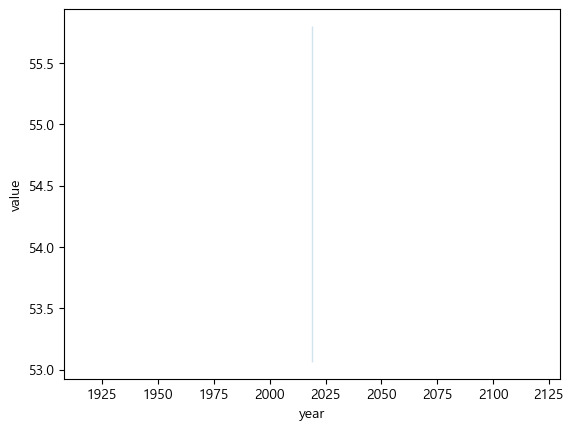

In [27]:
# 1) year를 x축으로 하고, value를 y축으로 하는 line plot을 그리세요. 
# === 아래에 코드 작성 === 

import seaborn as sns
sns.lineplot(x="year", y="value", data=years)

(2) box plot 시각화

In [28]:
# insurance_df 데이터를 사용합니다. 
insurance_df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


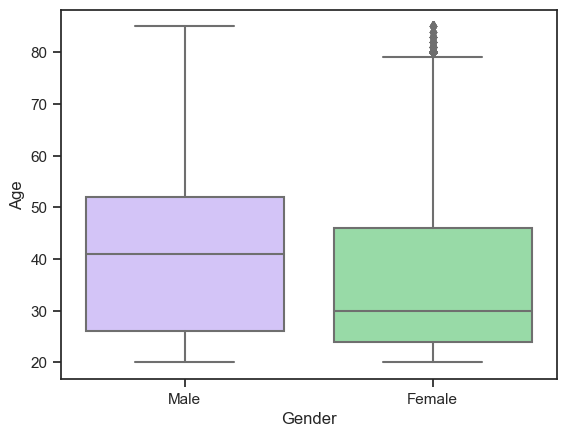

In [44]:
# 1) Gender를 x축으로 하고, Age를 y축으로 하는 boxplot을 그리세요. 
# === 아래에 코드 작성 === 

sns.set_theme(style="ticks", palette="pastel")
ah=sns.boxplot(x="Gender", y="Age", data=insurance_df, palette=["m", "g"])
plt.show()

(3) bar plot 시각화

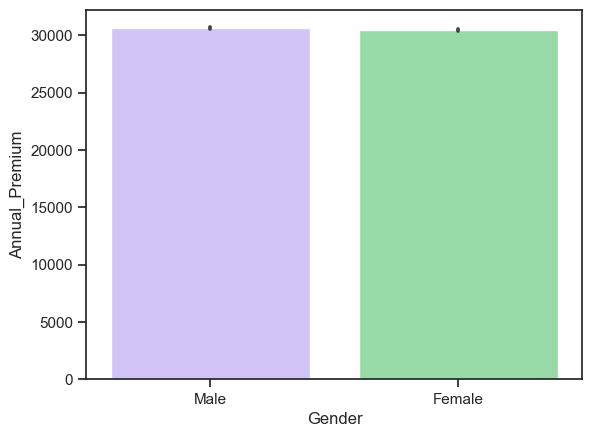

In [45]:
# 1) Gender을 x축으로 하고, Annual Premium을 y축으로 하는 bar plot을 그리세요. 
# === 아래에 코드 작성 === 

az=sns.barplot(x="Gender", y="Annual_Premium", data=insurance_df, palette=["m", "g"])
plt.show()

(7) regplot 시각화

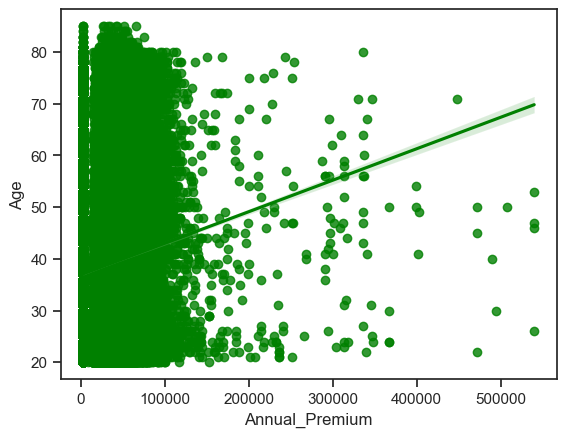

In [50]:
# 1) Annual_Premium(x축) Age(y축)의 관계를 확인하세요. 
# === 아래에 코드 작성 === 

ax=sns.regplot(x="Annual_Premium", y="Age", data=insurance_df, color='green')
plt.show()

## 4. 데이터 EDA 실습 (pandas profiling) 


In [33]:
# 샘플 데이터 링크 : https://www.kaggle.com/datasets/webdevbadger/international-student-demographics
# academic.csv데이터 사용.
# 데이터 설명(data description)
# year: The year. The format is YYYY/YY.
# students: The number of students.
# us_students: The number of non-international students.
# undergraduate: The number of undergraduate students.
# graduate: The number of graduate students.
# non_degree: The number of non-degree students.
# opt: The number of OPT students. OPT stands for Optional Practical Training.

academic = pd.read_csv('C:/Users/BIG3-06/Documents/빅데이터/데이터EDA 실습 데이터/academic.csv')
academic

,year,students,us_students,undergraduate,graduate,non_degree,opt
0,1948/49,25464,2403400.0,NaN,NaN,NaN,NaN
1,1949/50,26433,2445000.0,NaN,NaN,NaN,NaN
2,1950/51,29813,2281000.0,NaN,NaN,NaN,NaN
3,1951/52,30462,2102000.0,NaN,NaN,NaN,NaN
4,1952/53,33675,2134000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
70,2018/19,1095299,19828000.0,431930.0,377943.0,62341.0,223085.0
71,2019/20,1075496,19720000.0,419321.0,374435.0,58201.0,223539.0
72,2020/21,914095,19744000.0,359787.0,329272.0,21151.0,203885.0
73,2021/22,948519,20327000.0,344532.0,385097.0,34131.0,184759.0


In [34]:
# 1) 데이터의 형태(shape)를 확인하세요. 
# === 아래에 코드 작성 === 

academic.shape

(75, 7)

In [35]:
# 2) 각 컬럼들의 데이터 형태(type)를 확인하세요. 
# === 아래에 코드 작성 === 

academic.dtypes

year              object
students           int64
us_students      float64
undergraduate    float64
graduate         float64
non_degree       float64
opt              float64
dtype: object

In [36]:
# 3) 각 컬럼들의 결측치 개수를 확인하세요.
# === 아래에 코드 작성 === 

academic.isna().sum()

year              0
students          0
us_students       3
undergraduate    26
graduate         26
non_degree       31
opt              31
dtype: int64

In [37]:
# 4) 결측치가 있을 경우, 0으로 채우고 결측치가 없는지 다시 확인하세요. 
# === 아래에 코드 작성 === 

academic.fillna(0).isna().sum()

year             0
students         0
us_students      0
undergraduate    0
graduate         0
non_degree       0
opt              0
dtype: int64

In [38]:
# 5) str.split을 사용해 year 값만 추출한 새로운 컬럼을 만드세요. 
# === 아래에 코드 작성 === 

academic['yearA']=academic['year'].str.split("/", expand=True)[0]
academic

,year,students,us_students,undergraduate,graduate,non_degree,opt,yearA
0,1948/49,25464,2403400.0,NaN,NaN,NaN,NaN,1948
1,1949/50,26433,2445000.0,NaN,NaN,NaN,NaN,1949
2,1950/51,29813,2281000.0,NaN,NaN,NaN,NaN,1950
3,1951/52,30462,2102000.0,NaN,NaN,NaN,NaN,1951
4,1952/53,33675,2134000.0,NaN,NaN,NaN,NaN,1952
...,...,...,...,...,...,...,...,...
70,2018/19,1095299,19828000.0,431930.0,377943.0,62341.0,223085.0,2018
71,2019/20,1075496,19720000.0,419321.0,374435.0,58201.0,223539.0,2019
72,2020/21,914095,19744000.0,359787.0,329272.0,21151.0,203885.0,2020
73,2021/22,948519,20327000.0,344532.0,385097.0,34131.0,184759.0,2021


In [39]:
# 6) groupby를 사용하여 students 컬럼의 연도별(year) 평균, 최소, 최대, 합계를 구하세요. 
# === 아래에 코드 작성 === 

academic_group=academic.groupby('year')['students'].agg(['mean', 'min', 'max', 'sum']).reset_index()
academic_group
# 각 집계 결과를 개별로 groupby 하여 merge해도 수치가 맞으면 정답.

,year,mean,min,max,sum
0,1948/49,25464.0,25464,25464,25464
1,1949/50,26433.0,26433,26433,26433
2,1950/51,29813.0,29813,29813,29813
3,1951/52,30462.0,30462,30462,30462
4,1952/53,33675.0,33675,33675,33675
...,...,...,...,...,...
70,2018/19,1095299.0,1095299,1095299,1095299
71,2019/20,1075496.0,1075496,1075496,1075496
72,2020/21,914095.0,914095,914095,914095
73,2021/22,948519.0,948519,948519,948519


In [51]:
# 7) pandas profiling 리포트를 만들고 제출하세요. 
# profiling 설치가 안되어 있을경우 아래 코드 실행
# %pip install ydata-profiling

# === 아래에 코드 작성 === 

from ydata_profiling import ProfileReport
from IPython.display import display
profile = ProfileReport(academic, title='Profiling Report', explorative=True)

# Save the report to an HTML file
profile.to_file("profiling_report_academic.html")

C:\Users\BIG3-06\AppData\Roaming\Python\Python311\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---
*Copyright(c) 2024 All rights reserved by Hyeonjae Kim*